# Loading and Basic Text Extraction

In [1]:
#%pip install "natural-pdf[all]"

In this tutorial, we'll learn how to:

1. Load a PDF document
2. Extract text from pages
3. Extract specific elements 

## Loading a PDF

Let's start by loading a PDF file:

In [2]:
from natural_pdf import PDF
import os

# Load a PDF file
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")

# Basic info about the document
{
    "Filename": os.path.basename(pdf.path),
    "Pages": len(pdf.pages),
    "Title": pdf.metadata.get("Title", "N/A"),
    "Author": pdf.metadata.get("Author", "N/A")
}

{'Filename': 'tmp_knnuaon.pdf', 'Pages': 1, 'Title': 'N/A', 'Author': 'N/A'}

## Extracting Text

Now that we have loaded the PDF, let's extract the text from the first page:

In [3]:
# Get the first page
page = pdf.pages[0]

# Extract text from the page
text = page.extract_text()

# Show the first 200 characters of the text
print(text[:200])

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men


## Finding and Extracting Specific Elements

We can find specific elements using spatial queries and text content:

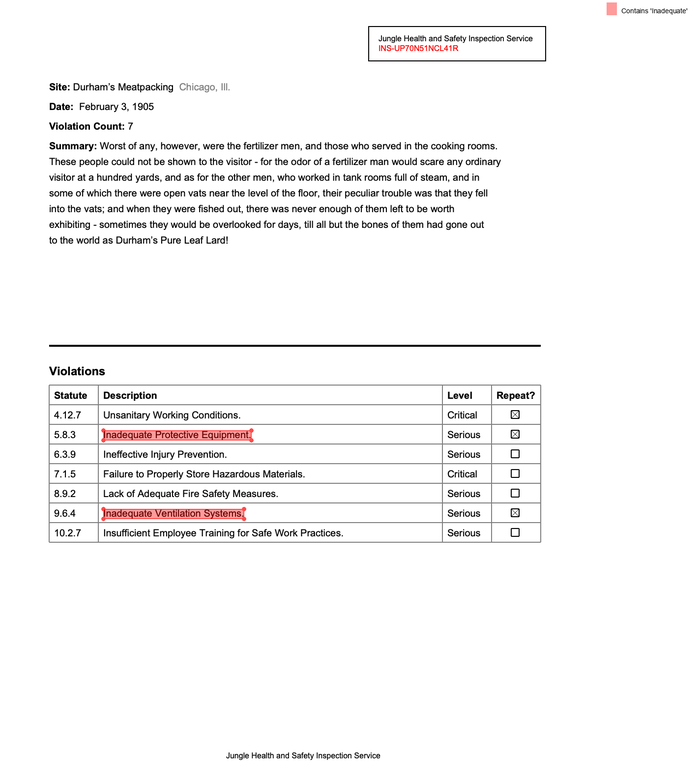

In [4]:
# Find text elements containing specific words
elements = page.find_all('text:contains("Inadequate")')

# Show these elements on the page
page.clear_highlights()
elements.highlight(color="red", label="Contains 'Inadequate'")

# Display the page to see them
page.to_image(width=700)

## Working with Layout Regions

We can analyze the layout of the page to identify different regions:

2025-04-27T17:42:07.515586Z [warning  ] GOOGLE_API_KEY environment variable not set. Gemini detector (via OpenAI lib) will not be available. lineno=76 module=natural_pdf.analyzers.layout.gemini


[2025-04-27 13:42:07,515] [ WARNING] gemini.py:76 - GOOGLE_API_KEY environment variable not set. Gemini detector (via OpenAI lib) will not be available.


image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpshbyy4gl/temp_layout_image.png: 1024x800 2 titles, 3 plain texts, 2 abandons, 1 table, 1419.1ms


Speed: 4.2ms preprocess, 1419.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


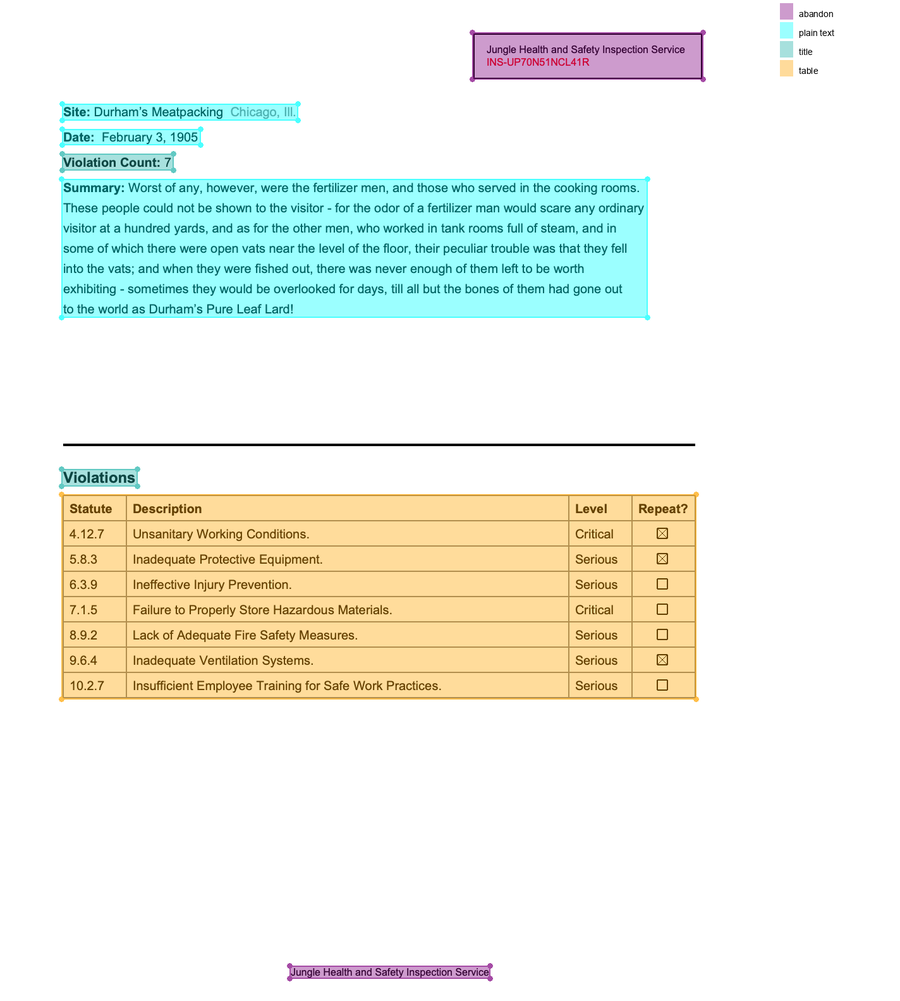

In [5]:
# Analyze the page layout
page.analyze_layout(engine='yolo')

# Find and highlight all detected regions
page.clear_highlights()
page.find_all('region').highlight(group_by='type')

# Display the page to see the regions
page.to_image(width=900)

## Working with Multiple Pages

You can also work with multiple pages:

In [6]:
# Process all pages
for page in pdf.pages:
    page_text = page.extract_text()
    print(f"Page {page.number}", page_text[:100])  # First 100 chars of each page

Page 1 Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Il


This tutorial covered the basics of loading PDFs and extracting text. In the next tutorials, we'll explore more advanced features like searching for specific elements, extracting structured content, and working with tables. 

In [7]:
%%bash
pip install "natural-pdf[all]"